<a href="https://colab.research.google.com/github/prithviemmidi/LifeSatisfactionAnalysis/blob/main/Decision_Tree_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [159]:
from google.colab import drive
drive.mount("/content/drive")

import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.tree import DecisionTreeRegressor as dtr
from sklearn.tree import plot_tree
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [160]:
path = "/content/drive/MyDrive/lifesat_csv.csv"
df_old = pd.read_csv(path)
df_old.head()

,pidp,agenew,incomecpi,male,neduc,ueduc,oheduc,Alevel,gcse,otheduc,...,member34,othersize,pomst,agesq,openness_std,neuroticism_std,agreeableness_std,extraversion_std,conscientiousness_std,yearid
0,68035365,45,1981.589,1,0,0,0,0,0,1,...,0,0,0.00000,2025,1.134772,1.7147,1.33485,0.318156,-0.471428,1
1,68035365,46,2110.081,1,0,0,0,0,0,1,...,0,0,33.33333,2116,1.134772,1.7147,1.33485,0.318156,-0.471428,2
2,68035365,46,2351.826,1,0,0,0,0,0,1,...,0,0,66.66666,2116,1.134772,1.7147,1.33485,0.318156,-0.471428,3
3,68035365,48,2219.140,1,0,0,0,0,0,1,...,0,0,66.66666,2304,1.134772,1.7147,1.33485,0.318156,-0.471428,4
4,68035365,49,2498.854,1,0,0,0,0,0,1,...,0,0,50.00000,2401,1.134772,1.7147,1.33485,0.318156,-0.471428,5


In [161]:
agg_rules = {col: 'mean' for col in df_old.columns if col != 'pidp'}
agg_rules['male'] = 'max'
agg_rules['pomst'] = 'max'

df = df_old.groupby('pidp').agg(agg_rules).reset_index()

print(f"Original rows in df_old: {len(df_old)}")
print(f"Unique individuals in df: {len(df)}")

Original rows in df_old: 25128
Unique individuals in df: 1047


In [162]:
df.head()

,pidp,agenew,incomecpi,male,neduc,ueduc,oheduc,Alevel,gcse,otheduc,...,member34,othersize,pomst,agesq,openness_std,neuroticism_std,agreeableness_std,extraversion_std,conscientiousness_std,yearid
0,68035365,57.041667,2493.496375,1,0.0,0.0,0.0,0.0,0.0,1.0,...,0.000000,0.000000,66.66666,3308.041667,1.134772,1.714700,1.334850,0.318156,-0.471428,12.5
1,68058485,64.291667,4008.875375,1,0.0,0.0,0.0,0.0,1.0,0.0,...,0.125000,0.083333,66.66666,4185.458333,-0.410277,1.714700,-0.626826,-0.449034,-0.471428,12.5
2,68058489,64.291667,4008.875375,0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.125000,0.083333,100.00000,4185.458333,-1.955325,0.315594,-0.626826,-0.449034,-0.471428,12.5
3,68064609,57.291667,4231.804125,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.166667,0.125000,100.00000,3334.375000,0.362247,-0.383959,1.334850,1.085346,1.368915,12.5
4,68097245,58.791667,1964.208062,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.000000,0.000000,100.00000,3514.958333,1.134772,1.015147,0.354012,1.852535,-0.471428,12.5


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   pidp                   1047 non-null   int64  
 1   agenew                 1047 non-null   float64
 2   incomecpi              1047 non-null   float64
 3   male                   1047 non-null   int64  
 4   neduc                  1047 non-null   float64
 5   ueduc                  1047 non-null   float64
 6   oheduc                 1047 non-null   float64
 7   Alevel                 1047 non-null   float64
 8   gcse                   1047 non-null   float64
 9   otheduc                1047 non-null   float64
 10  single                 1047 non-null   float64
 11  married                1047 non-null   float64
 12  others                 1047 non-null   float64
 13  selfemploy             1047 non-null   float64
 14  employed               1047 non-null   float64
 15  unem

In [164]:
df.describe()

,pidp,agenew,incomecpi,male,neduc,ueduc,oheduc,Alevel,gcse,otheduc,...,member34,othersize,pomst,agesq,openness_std,neuroticism_std,agreeableness_std,extraversion_std,conscientiousness_std,yearid
count,1.047000e+03,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,...,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.0
mean,4.254653e+08,52.281797,4085.248531,0.436485,0.086796,0.218322,0.113976,0.205548,0.276226,0.099132,...,0.393545,0.059296,90.003187,2915.440823,-0.007413,-0.018481,-0.050689,-0.013047,0.048860,12.5
std,2.434545e+08,11.194397,2062.525185,0.496186,0.267597,0.403630,0.309850,0.390301,0.434353,0.286761,...,0.343424,0.158099,9.603901,1189.712462,0.947431,0.970993,0.968454,0.993709,0.919850,0.0
min,6.803536e+07,29.833333,696.105387,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,50.000000,947.500000,-2.727849,-1.783065,-4.550178,-2.750603,-3.231943,12.5
25%,2.053444e+08,43.791667,2680.394821,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.041667,0.000000,83.333340,1976.208333,-0.410277,-1.083512,-0.626826,-0.449034,-0.471428,12.5
50%,4.097122e+08,51.791667,3806.917375,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.333333,0.000000,83.333340,2740.875000,0.362247,-0.383959,0.354012,0.318156,0.448744,12.5
75%,6.154190e+08,60.791667,4980.267125,1.000000,0.000000,0.000000,0.000000,0.000000,0.916667,0.000000,...,0.708333,0.000000,100.000000,3754.125000,0.362247,0.315594,0.354012,0.318156,0.448744,12.5
max,8.200304e+08,83.875000,18702.897917,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,100.000000,7095.041667,1.907296,2.414253,1.334850,1.852535,1.368915,12.5




```
Sorting into categorical variables
```



In [165]:
df["genders"] = df["male"].map({0: "Female", 1: "Male"})
df['marital_status'] = df[['single','married','others']].idxmax(axis=1)
df['employment_status'] = df[['selfemploy','employed','unemploy','retired','sick','familycare','student']].idxmax(axis=1)
df['household_size'] = df[['onemember','twomember','member34','othersize']].idxmax(axis=1)

In [166]:
df['education'] = df[['neduc','ueduc','oheduc','Alevel','gcse','otheduc']].idxmax(axis=1)
education_labels = {
    'neduc': 'None',
    'gcse': 'GCSE',
    'Alevel': 'A-level',
    'otheduc': 'Other ',
    'ueduc': 'University',
    'oheduc': 'Other Higher'}
df['education'] = df['education'].map(education_labels)

In [167]:
traits = [
    'openness_std',
    'neuroticism_std',
    'agreeableness_std',
    'extraversion_std',
    'conscientiousness_std']

In [168]:
df['pomst'].unique()

array([ 66.66666, 100.     ,  83.33334,  50.     ])

In [169]:
df['pomst'].describe()

,pomst
count,1047.000000
mean,90.003187
std,9.603901
min,50.000000
25%,83.333340
50%,83.333340
75%,100.000000
max,100.000000


In [170]:
pomst_table = df['pomst'].value_counts()
pomst_table

,count
pomst,
83.33334,547
100.00000,462
66.66666,33
50.00000,5


Coding decision tree

In [171]:
features = traits + ['male']
target = 'pomst'

In [172]:
df_tree = df[features + [target]].dropna()

In [173]:
df_tree.head()

,openness_std,neuroticism_std,agreeableness_std,extraversion_std,conscientiousness_std,male,pomst
0,1.134772,1.714700,1.334850,0.318156,-0.471428,1,66.66666
1,-0.410277,1.714700,-0.626826,-0.449034,-0.471428,1,66.66666
2,-1.955325,0.315594,-0.626826,-0.449034,-0.471428,0,100.00000
3,0.362247,-0.383959,1.334850,1.085346,1.368915,0,100.00000
4,1.134772,1.015147,0.354012,1.852535,-0.471428,0,100.00000


decision tree

In [174]:
# Prepare X and y
X = df_tree[features]
y = df_tree[target]
ys = y.astype(str)

In [175]:
tree_model = dtc(min_samples_leaf=75, criterion='gini', splitter='best',random_state=17)
tree_model.fit(X, ys)

DecisionTreeClassifier(min_samples_leaf=75, random_state=17)

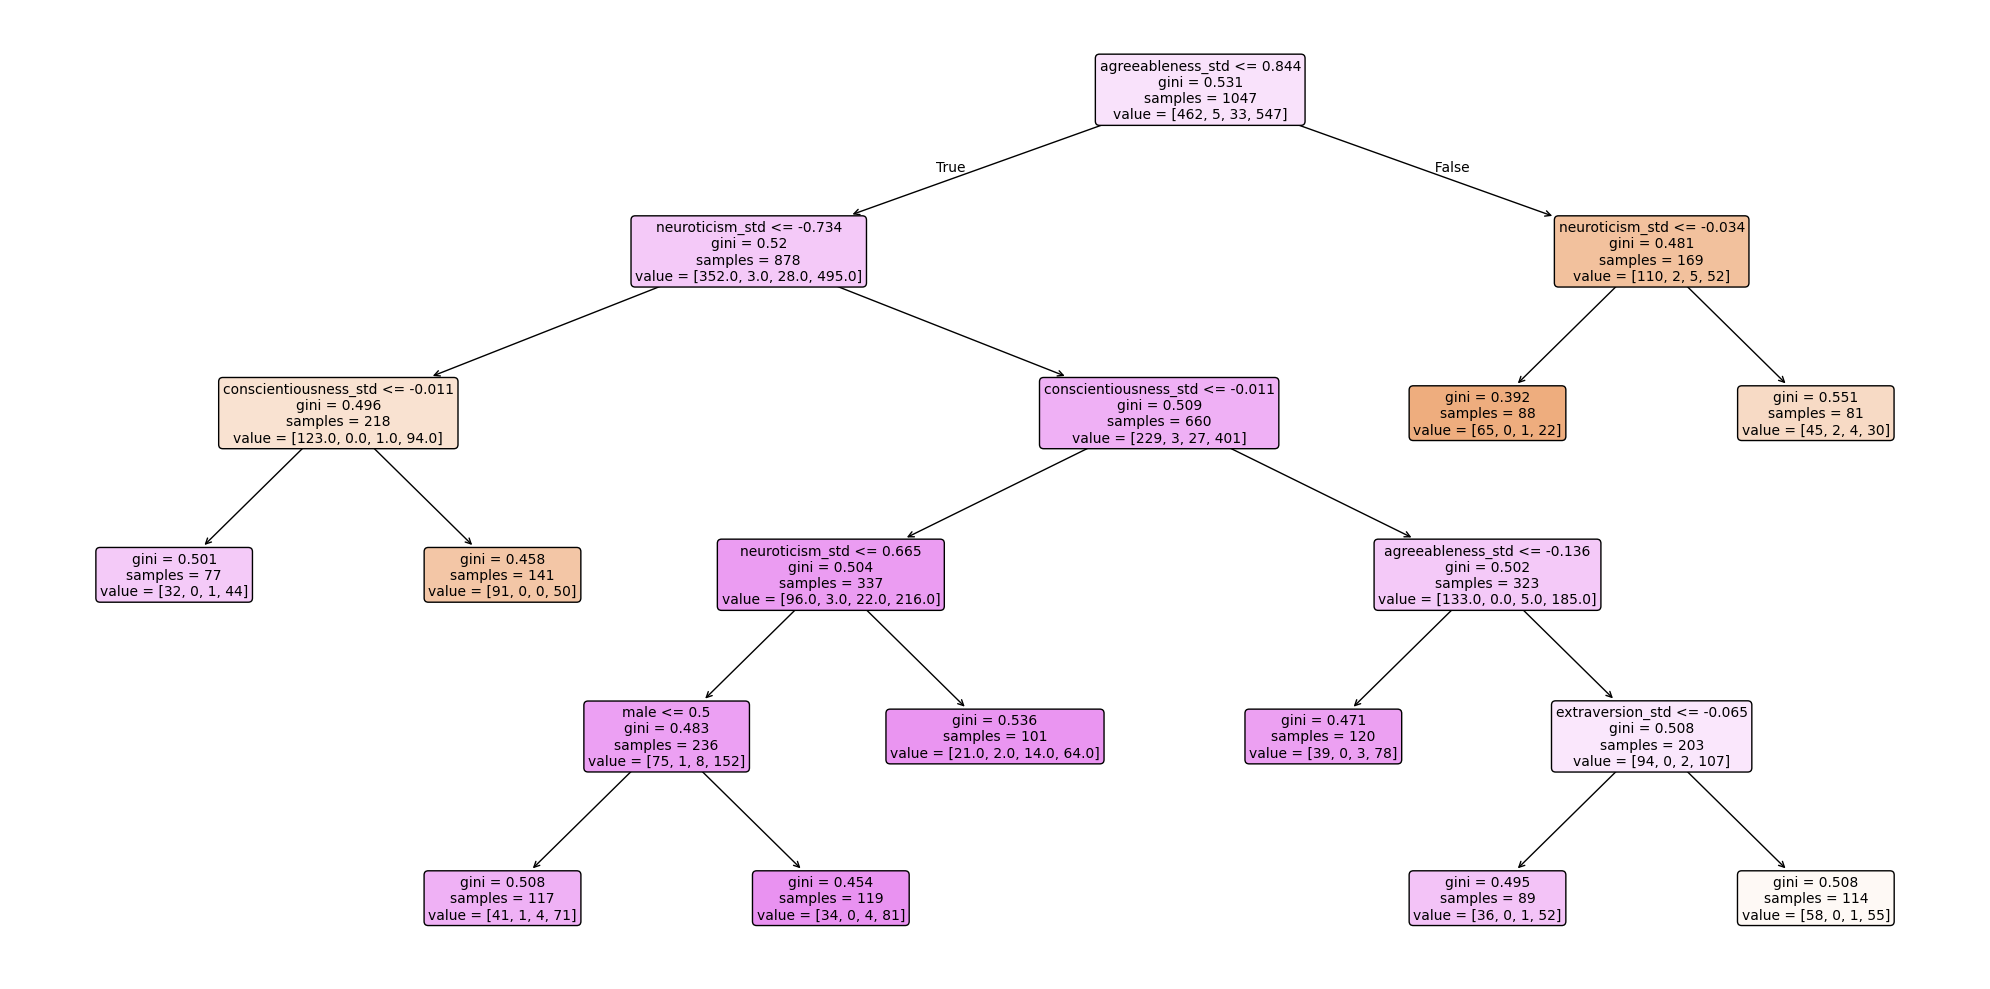

In [176]:
plt.figure(figsize=(20, 10))
plot_tree(tree_model,
          feature_names=features,
          filled=True,
          rounded=True,
          fontsize=10)
plt.tight_layout()

In [177]:
# Print feature importance
print("Feature Importance:")
for feat, imp in zip(features, tree_model.feature_importances_):
    print(f"  {feat}: {imp:.3f}")

Feature Importance:
  openness_std: 0.000
  neuroticism_std: 0.350
  agreeableness_std: 0.432
  extraversion_std: 0.022
  conscientiousness_std: 0.184
  male: 0.012


including education to classify individuals

In [179]:
features2 = features + ['neduc','ueduc','oheduc','Alevel','gcse','otheduc']

In [180]:
df_tree2 = df[features2 + [target]].dropna()

In [181]:
# Prepare X and y
X2 = df_tree2[features2]
y2 = df_tree2[target]
ys2 = y2.astype(str)

In [182]:
tree_model2 = dtc(min_samples_leaf=75, criterion='gini', splitter='best',random_state=17)
tree_model2.fit(X2, ys2)

DecisionTreeClassifier(min_samples_leaf=75, random_state=17)

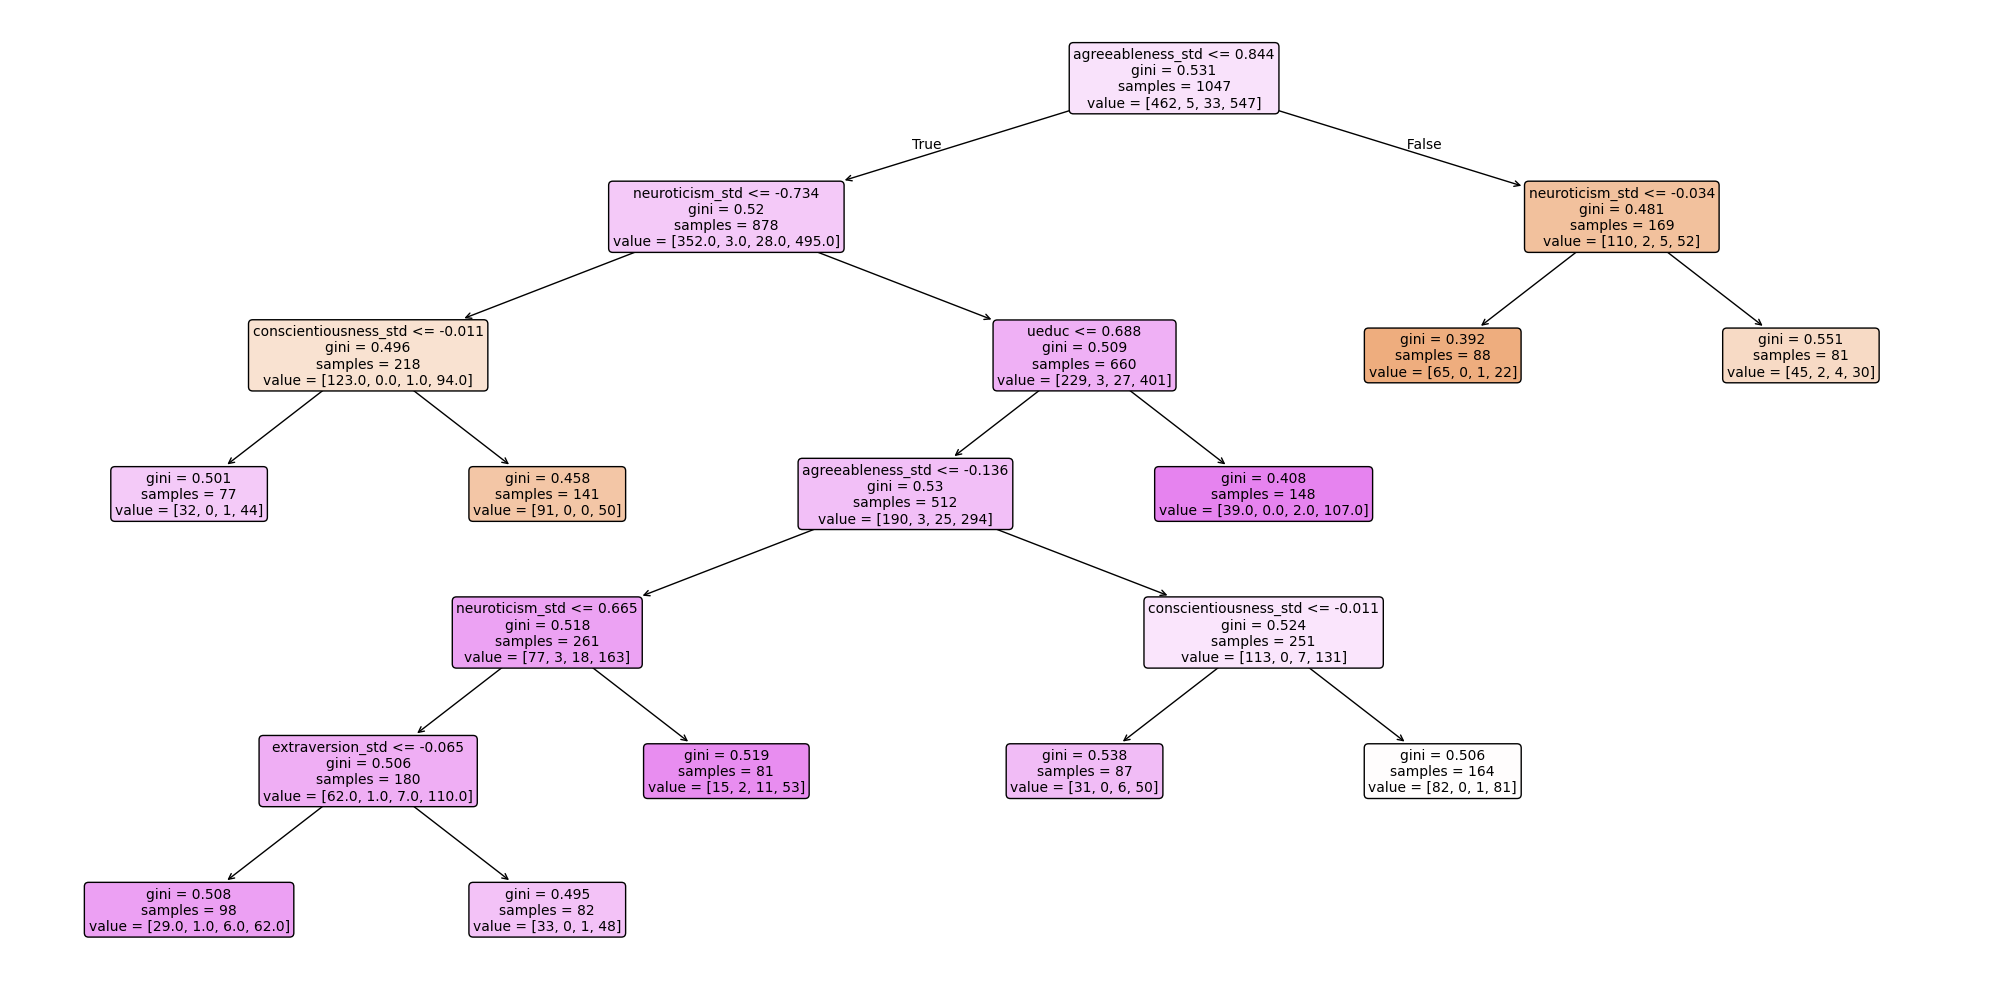

In [183]:
plt.figure(figsize=(20, 10))
plot_tree(tree_model2,
          feature_names=features2,
          filled=True,
          rounded=True,
          fontsize=10)
plt.tight_layout()

In [184]:
# Print feature importance
print("Feature Importance:")
for feat, imp in zip(features2, tree_model2.feature_importances_):
    print(f"  {feat}: {imp:.3f}")

Feature Importance:
  openness_std: 0.000
  neuroticism_std: 0.334
  agreeableness_std: 0.443
  extraversion_std: 0.014
  conscientiousness_std: 0.131
  male: 0.000
  neduc: 0.000
  ueduc: 0.078
  oheduc: 0.000
  Alevel: 0.000
  gcse: 0.000
  otheduc: 0.000
